## <font color='black'>**Automating Loan Approval Processes with Predictive Modeling Techniques**
#### <font color='blue'>**Mariwan Ibrahim**
***

### <font color='green'>**Introduction**

The loan approval process is essential in the financial services industry but traditionally relies on manual, subjective evaluations by loan officers. This approach can be slow, prone to bias, and error-prone. To address these issues, financial institutions are turning to machine learning (ML) for automation.  

Machine learning models can analyze historical loan data to predict loan approval outcomes accurately. This project explores various ML algorithms to automate loan approval decisions, aiming to enhance efficiency, reduce risk, and improve customer experience.  

By automating the loan approval process using predictive modeling techniques, financial institutions can achieve faster processing times, reduce operational costs, and minimize the risk of defaults. This project not only demonstrates the power of machine learning in enhancing financial services but also underscores the potential for innovation in automating complex decision-making processes.

### <font color='green'>**Exploratory Data Analysis (EDA)**

EDA is a critical step in the data science process that involves summarizing the main characteristics of the dataset, often using visual methods. In the context of automating loan approval processes with predictive modeling techniques, EDA helps us understand the data's structure, detect patterns, spot anomalies, and test hypotheses. This step is essential before moving on to data preprocessing, feature selection, and model training.

#### 1. **Reading Dataset**
Let's load the dataset using pandas library and display the first 5 rows. I will be dropping Loan_ID, which does not provide any information. 

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Mariwan/Desktop/loan.csv').drop(columns = 'Loan_ID')
df['Loan_Status'] = df['Loan_Status'].replace({'Y':'Yes', 'N':'No'})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Yes


#### 2. **Summary Statistics**
I will generate summary statistics for categorical and numeric features to have an idea about the loan dataset.

In [2]:
df.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Yes
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


The loan dataset contains 614 instances, each with 11 features and a target variable. The majority of applicants are male, married, graduate students, and self-employed. Most applicants have no dependents. The average applicant income is 5403.46 with a high standard deviation of 6109.04, indicating significant income variability. The average co-applicant income is 1621.25, also with a large standard deviation of 2926.25. The mean loan amount borrowed is 146.41, and the average loan term is 342 months.

#### 3. **Identify Null Values**
Let's display the missing values of each feature and see how many null values the loan dataset has.

In [3]:
df.isnull().sum().reset_index().rename(columns = {'index':'Columns', 0:'Count'})

,Columns,Count
0,Gender,13
1,Married,3
2,Dependents,15
3,Education,0
4,Self_Employed,32
5,ApplicantIncome,0
6,CoapplicantIncome,0
7,LoanAmount,22
8,Loan_Amount_Term,14
9,Credit_History,50


As observed, the features 'Gender', 'Married', 'Dependents', and 'Loan_Amount_Term' have a few missing values, while 'Credit_History', 'Self_Employed', and 'LoanAmount' contain a significant number of missing values. To address these, I will use Scikit-learn's imputer to fill in the missing values. Additionally, I will convert 'Credit_History' to an object type and Assign a special value to represent missing values in 'Credit_History', such as 'unknown' that allows the model to learn from it.

In [4]:
import numpy as np
# Replacing null values with unknown
df['Credit_History'] = df['Credit_History'].map({0:'0', 1:'1', np.nan:'unknown'})
df['Credit_History'].value_counts().reset_index()

,Credit_History,count
0,1,475
1,0,89
2,unknown,50


#### 4. **Feature Engineering**
In the loan dataset, we observe that the **`'CoapplicantIncome'`** feature has a minimum value of 0, and the 25th percentile is also zero. Let's determine the number of zero values in the **`'CoapplicantIncome'`** feature.

In [5]:
# Counting zero values
coapp = df['CoapplicantIncome']
coapp[coapp == 0.0].shape

(273,)

The **`'CoapplicantIncome'`** feature has 273 zero values, indicating that almost half of the coapplicants have no income. In this case, I prefer to create an indicator feature that flags whether the coapplicant income is zero. This can help the model learn the impact of having no coapplicant income.

In [6]:
# Create a new indicator feature
df['CoapplicantIncome_indicator'] = df['CoapplicantIncome'].apply(lambda x: 'No' if x == 0.0 else 'Yes')

# Drop coapplicantincome feature
df.drop(columns = 'CoapplicantIncome', inplace = True)

The **`'Loan_Amount_Term'`** is a feature in loan datasets that represents the duration of the loan in months. It indicates the length of time over which the borrower is expected to repay the loan. First let's see the distribution of Loan_Amount_Term.

In [7]:
df['Loan_Amount_Term'].value_counts().reset_index().sort_values(by = 'Loan_Amount_Term')

,Loan_Amount_Term,count
9,12.0,1
8,36.0,2
7,60.0,2
5,84.0,4
6,120.0,3
1,180.0,44
4,240.0,4
3,300.0,13
0,360.0,512
2,480.0,15


Since most of the loans are for 360 months, I will categorize the **`'Loan_Amount_Term'`** feature as follows: loans equal to or less than 120 months will be considered short-term, loans equal to or less than 300 months will be considered medium-term, and loans equal to or less than 480 months will be considered long-term.

In [8]:
def categorize_loan_term(col):
    if col <= 120:
        return 'Short Term'
    elif col <= 300:
        return 'Meduim Term'
    elif col <= 480:
        return 'Long Term'
    else:
        return np.nan

# Creating new feature
df['Loan_Term'] = df['Loan_Amount_Term'].apply(categorize_loan_term)

# dropping Loan_Amount_Term
df.drop(columns = 'Loan_Amount_Term', inplace = True)

#### 5. **Feature Distribution**
Seaborn and Matplotlib are essential Python libraries for visualizing data distributions, detecting patterns, outliers, and understanding overall data structure. I will generate bar plot for categorical features, histogram and box plots for numeric features.

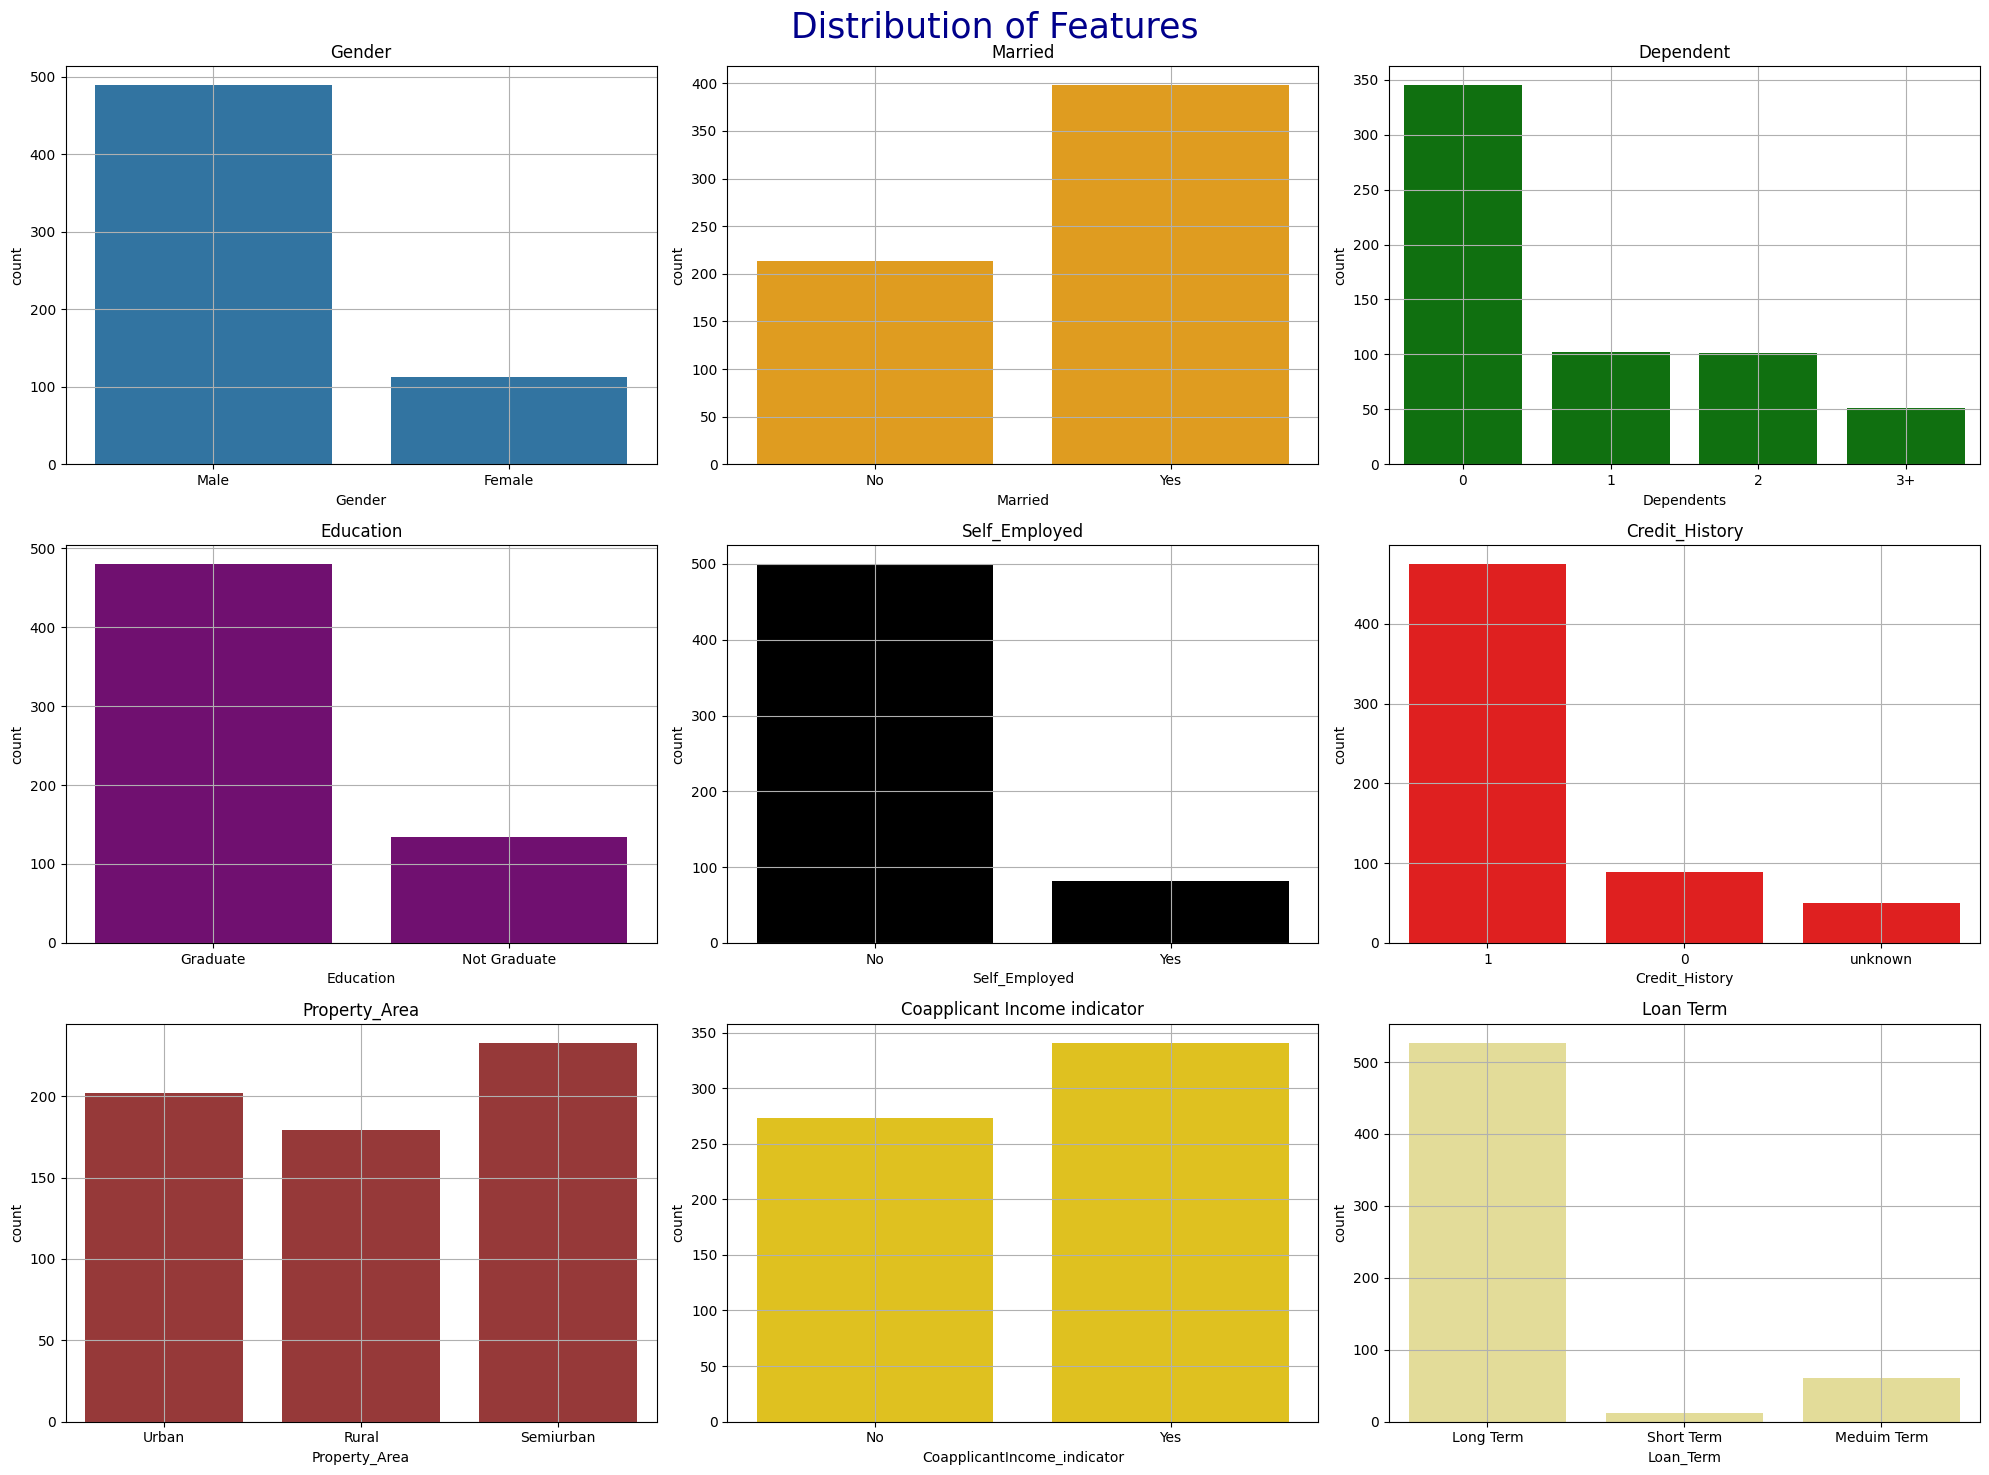

In [9]:
# Importing libraries seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Make bar plots for categorical features
plt.figure(figsize = (20, 15), layout = 'tight')
plt.subplot(3, 3, 1)
sns.countplot(df, x = 'Gender')
plt.title('Gender')
plt.grid()

plt.subplot(3, 3, 2)
sns.countplot(df, x = 'Married', color = 'orange')
plt.title('Married')
plt.grid()

plt.subplot(3, 3, 3)
sns.countplot(df, x = 'Dependents', color = 'green')
plt.title('Dependent')
plt.grid()

plt.subplot(3, 3, 4)
sns.countplot(df, x = 'Education', color = 'purple')
plt.title('Education')
plt.grid()

plt.subplot(3, 3, 5)
sns.countplot(df, x = 'Self_Employed', color = 'black')
plt.title('Self_Employed')
plt.grid()

plt.subplot(3, 3, 6)
sns.countplot(df, x = 'Credit_History', color = 'red')
plt.title('Credit_History')
plt.grid()

plt.subplot(3, 3, 7)
sns.countplot(df, x = 'Property_Area', color = 'brown')
plt.title('Property_Area')
plt.grid()

plt.subplot(3, 3, 8)
sns.countplot(df, x = 'CoapplicantIncome_indicator', color = 'gold')
plt.title('Coapplicant Income indicator')
plt.grid()

plt.subplot(3, 3, 9)
sns.countplot(df, x = 'Loan_Term', color = 'khaki')
plt.title('Loan Term')
plt.grid()

plt.suptitle('Distribution of Features', size = 25, color = 'darkblue')
plt.show()

The bar plots indicate that some categorical features, such as gender, dependents, education, self-employment, credit history and loan term have imbalanced categories. Due to this imbalance, these features might have limited influence on the model.

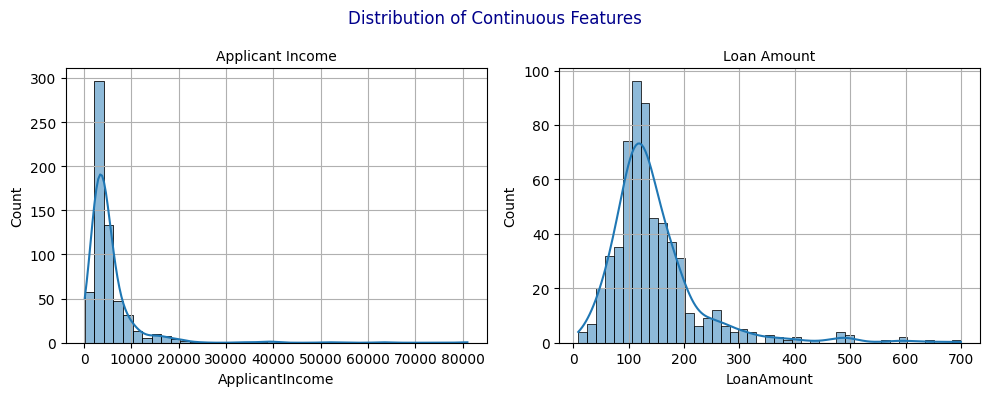

In [10]:
# Histogram for continuous features
plt.figure(figsize = (10, 4), layout = 'tight')

plt.subplot(1, 2, 1)
sns.histplot(df, x = 'ApplicantIncome', bins = 40,kde = True)
plt.title('Applicant Income', size = 10)
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(df, x = 'LoanAmount', kde = True)
plt.title('Loan Amount', size = 10)
plt.grid()

plt.suptitle('Distribution of Continuous Features', size = 12, color = 'darkblue')
plt.show()

The histogram plots of continuous features reveal that applicant income and loan amount are left-skewed and appear to follow a normal distribution.

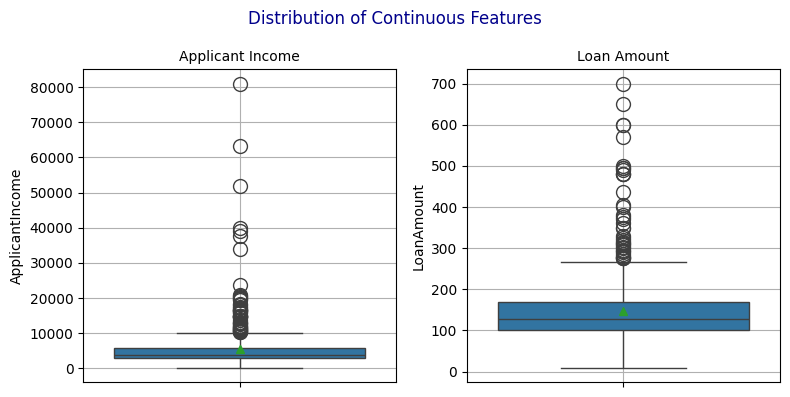

In [11]:
# Box plot for continuous features
plt.figure(figsize = (8, 4), layout = 'tight')

plt.subplot(1, 2, 1)
sns.boxplot(df, y = 'ApplicantIncome', showmeans = True, fliersize = 10)
plt.title('Applicant Income', size = 10)
plt.grid()

plt.subplot(1, 2, 2)
sns.boxplot(df, y = 'LoanAmount', showmeans = True, fliersize = 10)
plt.title('Loan Amount', size = 10)
plt.grid()


plt.suptitle('Distribution of Continuous Features', size = 12, color = 'darkblue')
plt.show()

Box plots indicate that Applicant Income and Loan Amount have many outliers. Therefore, I will standardize these features using the StandardScaler from scikit-learn.

#### 6. **Correlation Analysis**
The correlation matrix is used to find the relationships between continuous features, and a heatmap is utilized to visualize these correlations.

In [12]:
features = df[['ApplicantIncome', 'LoanAmount']]
cor = features.corr()
cor

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.570909
LoanAmount,0.570909,1.000000


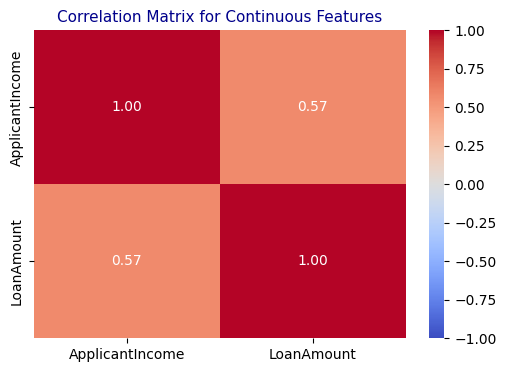

In [13]:
# Visualizing correlation matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cor, annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Correlation Matrix for Continuous Features', size = 11, color = 'darkblue')
plt.show()

We see a positive strong relationship between ApplicantIncome and LoanAmount, suggesting that higher incomes are associated with larger amounts.

#### 7. **Target Analysis**
First, it is crucial to examine the target distribution to determine if it is balanced or imbalanced. Additionally, I will analyze the relationship between the features and the target variable.

In [14]:
# Target distribution
df['Loan_Status'].value_counts(normalize = True).reset_index()

,Loan_Status,proportion
0,Yes,0.687296
1,No,0.312704


The frequency table above shows that the target classes are imbalanced, with 69% 'Yes' and 31% 'No'. To address this imbalance, I will utilize the `class_weight` parameter in the models to mitigate the impact of the imbalanced classes.

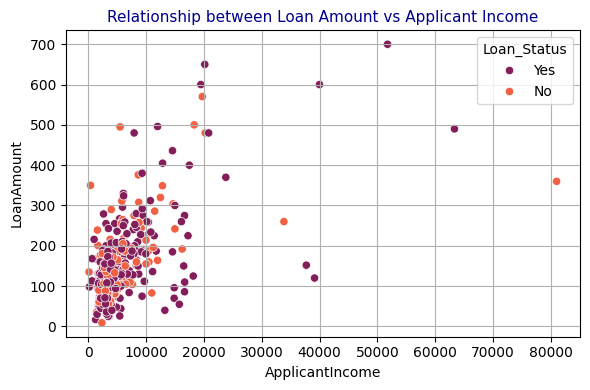

In [15]:
# Visualization
plt.figure(figsize = (6, 4), layout = 'tight')
sns.scatterplot(df, x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', palette = 'rocket')
plt.title('Relationship between Loan Amount vs Applicant Income', size = 11, color = 'darkblue')
plt.grid()
plt.show()

The scatter plot above reveals a linear relationship between Loan Amount and Applicant Income across both target classes. This indicates that as Applicant Income increases, Loan Amount also tends to increase, suggesting a direct correlation between these two features.

#### 8. **Split Dataset**
Now we can split the loan dataset into training and testing sets by using test size 20 and train size 80..

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Loan_Status')
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

### **<font color='green'>Preprocessing**  

In this section, the features  will be categorized into four types: **numeric, binary, ordinal** and **nominal features**. The numeric features include 'ApplicantIncome' and 'LoanAmount', the binary features consist of 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', and 'CoapplicantIncome_indicator'. The ordinal feature is 'Loan_Term', while the nominal features are 'Credit_History' and 'Property_Area'. Denote that the null values in 'Credit_History' already filled in with 'unknown' value.  

First, I will put each type of feature into a list and make a pipeline for each of them. **SimpleImputer** will be used to fill in the null values in features, employing strategies such as 'most_frequent', 'constant' or 'median'. **OrdinalEncoder** and **OneHotEncoder** will be utilized to encode the binary, ordinal and nominal features. **StandardScaler** will be applied to standardize the numeric features. Finally, a ColumnTransformer will be used to apply these transformations to the respective columns.


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


# Listing each type of feature
numeric_feature = ['ApplicantIncome', 'LoanAmount']
binary_feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome_indicator']
nominal_feature = ['Property_Area', 'Credit_History']
ordinal_feature = ['Loan_Term']
sort_ordinal = [['Short Term', 'Medium Term', 'Long Term']]

# Pipeline for each type of feature
numeric_pipe = make_pipeline(SimpleImputer(strategy = 'median'),
                             StandardScaler())
binary_pipe = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = 'missing'),
                            OneHotEncoder(dtype = int, handle_unknown = 'ignore', drop = 'if_binary'))
nominal_pipe = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = 'missing'),
                             OneHotEncoder(dtype = int, handle_unknown = 'ignore'))
ordinal_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                             OrdinalEncoder(categories = sort_ordinal, dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -1))

# Creating column transformer
col_transform = make_column_transformer((numeric_pipe, numeric_feature),
                                       (binary_pipe, binary_feature),
                                       (nominal_pipe, nominal_feature),
                                       (ordinal_pipe, ordinal_feature))


### **<font color='green'>Methods & Results**

After conducting exploratory data analysis (EDA) on the loan dataset, we have gained insights. However, we're uncertain which algorithm would be optimal for this problem. To address this, I will begin by training a baseline model (Dummy Classifier) using the strategy of 'most frequent'. Subsequently, I will train a basic model (Decision Tree Classifier) and perform 10-fold cross-validation on the training dataset. Additionally, I will explore several suitable supervised machine learning models on the training dataset, incorporating 10-fold cross-validation. The `class_weight` parameter will be utilized with all estimators to mitigate the impact of imbalanced classes.  

The top-performing models will be selected based on their training scores and cross-validation scores. Subsequently, we will perform hyperparameter optimization using GridSearchCV to identify the best hyperparameter values for the models. Moreover, the best model, along with its optimal hyperparameters, will be evaluated on the test set, and a confusion matrix will be generated to visualize the model's predictions compared to the actual labels in the test set. Finally, we will present a classification report to assess the model's performance.

#### 1. **Dummy Classification**
The baseline model is the DummyClassifier with strategy most frequent.

In [18]:
from sklearn.dummy import DummyClassifier

# Training DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
train_score = dummy.score(X_train, y_train)
print('Dummy train score: {}'.format(train_score))

Dummy train score: 0.6782077393075356


dummy classification ignores the inputs and it relies on target with the most frequency occurence.

#### 2. **Decision Tree Classification**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Training dicision tree classifier
tree = DecisionTreeClassifier(class_weight = 'balanced', random_state = 123)
tree_pipe = make_pipeline(col_transform, tree)
# Performing cross validation
cv = cross_validate(tree_pipe, X_train, y_train, cv = 10, return_train_score = True)
# Results in dataframe
df_cv = pd.DataFrame(cv)
print(f"Mean train score: {df_cv['train_score'].mean()}\nMean CV score: {df_cv['test_score'].mean()}\n")
df_cv

Mean train score: 1.0
Mean CV score: 0.694530612244898



,fit_time,score_time,test_score,train_score
0,0.037978,0.017992,0.680000,1.0
1,0.039978,0.011993,0.632653,1.0
2,0.031981,0.010995,0.693878,1.0
3,0.030982,0.010995,0.775510,1.0
4,0.032982,0.009994,0.673469,1.0
5,0.030982,0.010997,0.653061,1.0
6,0.039974,0.011996,0.571429,1.0
7,0.030983,0.010994,0.755102,1.0
8,0.034980,0.011995,0.775510,1.0
9,0.032981,0.014989,0.734694,1.0


Decision tree classification performs perfectly on the training data (train_score = 1.0 for all folds), but the performance on the test data varies. This discrepancy often indicates overfitting, where the model learns the training data too well, including its noise, but fails to generalize to new, unseen data.

#### 3. **Algorithms**
I will examine the following models on the training dataset using default hyperparameters and perform 10-fold cross-validation on the training set, incorporating the class weight parameter where applicable. Note that the KNeighbors Classification model does not have a class weight parameter.

- *RandomForestClassifier*
- *KNieghborsClassifier*
- *SVC (Support Vector Classification)*
- *LogisticRegression*


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Storing the results in dictionary
dic = {'model':[], 'train score':[], 'CV score':[]}

# Different algorithms in dictionary
models = {'Forst':RandomForestClassifier(random_state = 123, class_weight = 'balanced'),
          'KNN':KNeighborsClassifier(),
          'SVC':SVC(random_state = 123, class_weight = 'balanced'),
          'LogRegression': LogisticRegression(random_state = 123, class_weight = 'balanced')}

# iterating the model dictionary and training each model
for name, model in models.items():
    main_pipe = make_pipeline(col_transform, model)
    cv = cross_validate(main_pipe, X_train, y_train, cv = 10, return_train_score = True)
    dic['model'].append(name)
    dic['train score'].append(cv['train_score'].mean())
    dic['CV score'].append(cv['test_score'].mean())

# Displaying the dictionary result in dataframe
dic_df = pd.DataFrame(dic)
dic_df

,model,train score,CV score
0,Forst,1.000000,0.784245
1,KNN,0.799049,0.743306
2,SVC,0.843857,0.784163
3,LogRegression,0.767370,0.725102


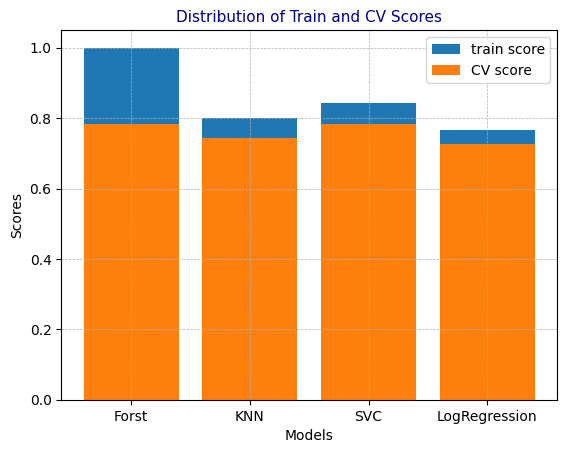

In [21]:
# Visualizing the model's train and CV scores
plt.bar(dic_df['model'], dic_df['train score'], label = 'train score')
plt.bar(dic_df['model'], dic_df['CV score'], label = 'CV score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Distribution of Train and CV Scores', size = 11, color = 'darkblue')
plt.legend()
plt.grid(linestyle = 'dashed', linewidth = 0.5)
plt.show()


The `Random Forest model` achieved perfect accuracy on the training set, indicating potential overfitting. Its cross-validation score suggests decent generalization to unseen data but highlights the overfitting concern. The `SVC` model performed well, with a good balance between training and cross-validation scores, indicating reasonable generalization.  

The `KNeighbors` model had a lower training score compared to Random Forest, indicating less overfitting. However, its cross-validation score was slightly lower, suggesting it might not be the best model for this problem. `Logistic Regression` had the lowest training and cross-validation scores among the models, indicating it might not capture the data patterns as effectively as the other models.  

Based on the cross-validation scores, both the Random Forest and SVC models demonstrate promising performance. However, the perfect training score of the Random Forest model suggests overfitting, so further tuning and validation are necessary. The SVC model shows a good balance between training and cross-validation scores, making it a strong candidate for further optimization.


#### 4. **Hyper-parameter Optimization**
Based on their training and cross-validation scores, the `RandomForestClassifier` and `SVC` have been selected for further evaluation. I will optimize their hyperparameters using `GridSearchCV` to determine the best model for this problem.  

**GridSearchCV**  
GridSearchCV is a technique used in machine learning to find the optimal hyperparameters for a given model. It automates the process of tuning the hyperparameters by performing an exhaustive search over a specified parameter grid. The selected model's hyper-parameters are like below:  

- **RandForestClassifier:** max_depth and min_samples_split
- **SVC:** gamma or C


In [22]:
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
# Set of hyper-parameter's values
param = {'randomforestclassifier__max_depth':list(range(2, 20)), 'randomforestclassifier__min_samples_split':list(range(2, 10))}

# Bulding the model
forest_pipe = make_pipeline(col_transform, RandomForestClassifier(random_state = 123, class_weight = 'balanced'))

# GridSearch
search = GridSearchCV(estimator = forest_pipe, param_grid = param, cv = 10, verbose = 1, n_jobs = -1, return_train_score = True)
search.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constan...
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Loan_Term'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [2, 3, 4, 5, 6, 7,
                                                               8, 9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19],
                         'randomforestclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9]},
             return_train_score=True, verbose=1)

In [23]:
# Best Hyper-parameters values
best_params = search.best_params_

# Best mean CV score
best_cv_score = search.best_score_

# Best train score
best_train_score = search.score(X_train, y_train)

print('The best Hyper-parameter values: {}\nThe best mean CV score: {}\nThe best mean train score: {}'.
      format(best_params, best_cv_score, best_train_score))

The best Hyper-parameter values: {'randomforestclassifier__max_depth': 11, 'randomforestclassifier__min_samples_split': 2}
The best mean CV score: 0.7944081632653062
The best mean train score: 0.9877800407331976


The best mean cross-validation score achieved is 0.79441, indicating the average performance of the model on unseen data during cross-validation.  

The best mean train score achieved is 0.9878, reflecting the average performance of the model on the training data across multiple folds during cross-validation.  

These scores suggest that the model is performing well on both training and cross-validation data, indicating good generalization capability and minimal overfitting. However, it's essential to further evaluate the model's performance on an independent test set to confirm its effectiveness.

In [24]:
# Performing on test set
test_score = search.score(X_test, y_test)
print('Test score: {}'.format(test_score))

Test score: 0.7642276422764228


The test score achieved is 0.7642, indicating the model's performance on an independent test dataset. This score represents the accuracy of the model in predicting the target variable on unseen data.

In [25]:
# Support Vector Classification SVC
import numpy as np

# Set of gamma values
param = {'svc__gamma':np.linspace(0, 1, 10).tolist()}

# Building SVC model
svc_pipe = make_pipeline(col_transform, SVC(random_state = 123, class_weight = 'balanced'))

# GridSearchCV
grid_search = GridSearchCV(estimator = svc_pipe, param_grid = param, verbose = 1, n_jobs = -1, return_train_score = True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         (...
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Loan_Term'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=123))]),
             n_jobs=-1,
             param_grid={'svc__gamma': [0.0, 0.1111111111111111,
                                        0.2222222222222222, 0.3333333333333333,
                                        0.4444444444444444, 0.5555555555555556,
                                        0.6666666666666666, 0.7777777777777777,
                                        0.8888888888888888, 1.0]},
             return_train_score=True, verbose=1)

In [26]:
# Best hyper-parameter value
best_par = grid_search.best_params_

# Best mean cross validation score
best_CV = grid_search.best_score_

# Best train score
train_score = grid_search.score(X_train, y_train)

print('The best Hyper-parameter values: {}\nThe best mean CV score: {}\nThe best mean train score: {}'.format(best_par, best_CV, train_score))

The best Hyper-parameter values: {'svc__gamma': 0.1111111111111111}
The best mean CV score: 0.761698618841476
The best mean train score: 0.8391038696537678


In [27]:
test_score = grid_search.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

Test Score: 0.7642276422764228


The best hyper-parameter value found through GridSearchCV for the SVC model was gamma: 0.11. This parameter significantly influences the decision boundary of the SVC. The mean training score of 0.8391 indicates that the model fits the training data quite well. However, it is not perfect, which suggests that the model is not overfitting. The mean cross-validation score of 0.7617 is close to the training score, which implies that the model generalizes reasonably well to unseen data during cross-validation. The test score of 0.7642 is consistent with the cross-validation score, reinforcing the model's ability to generalize to new, unseen data. 

#### 5. **Model Selection**
To determine which model is better between `SVC` and `RandomForestClassifier`, let's compare their performance metrics based on the results provided.  

**SVC (Support Vector Classifier)**
- Best Mean CV Score: 0.762
- Best Mean Train Score: 0.839
- Test Score: 0.764

**RandomForestClassifier**
- Best Mean CV Score: 0.794
- Best Mean Train Score: 0.988
- Test Score: 0.764

The `RandomForestClassifier` has a higher cross-validation score, indicating better performance during cross-validation. The `RandomForestClassifier` has a higher training score, suggesting it fits the training data better. However, a significantly higher training score compared to the cross-validation score might indicate overfitting. Surprisingly both models have the same test score of 0.764.  

In general, both models have the same test score indicates similar performance on the test set. However, the `RandomForestClassifier` shows signs of overfitting due to the high discrepancy between its training score and cross-validation score. The `SVC` model, while having slightly lower cross-validation and training scores, shows more consistent performance across training, cross-validation, and test datasets so `SVC` might be the more reliable choice due to its consistent performance and lower risk of overfitting. Well, you will choose to proceed with the `SVC` model for further evaluation.

Let's fine-tune additional hyperparameters for the SVC model. Apart from gamma, consider tuning C (regularization parameter), kernel (type of kernel), and degree (for polynomial kernel).

In [28]:
# Additional hyper-parameters values
params = {'svc__C': [0.1, 1, 10, 100],
          'svc__gamma': [0.001, 0.01, 0.1, 1],
          'svc__kernel': ['linear', 'rbf', 'poly'],
          'svc__degree': [2, 3, 4]}

# Building svc model
svc_model = make_pipeline(col_transform, SVC(random_state = 123, class_weight = 'balanced'))

# GridSearchCV
grid_svc = GridSearchCV(estimator = svc_model, param_grid = params, cv = 10, verbose = 1, n_jobs = -1, return_train_score = True)
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constan...
                                                                                                                      'Medium '
                                                                                                                      'Term',
                                                                                                                      'Long '
                                                                                                                      'Term']],
                                                                                                         dtype=<class 'int'>,
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Loan_Term'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=123))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3, 4],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, verbose=1)

In [29]:
# Best hyper-parameter values
best_params = grid_svc.best_params_
# Best cross validation score
best_score = grid_svc.best_score_
# best training score
train_score = grid_svc.score(X_train, y_train)

print(f'The best hyper-parameters: {best_params}\nThe best mean CV score: {best_score}\nThe best train score: {train_score}')

The best hyper-parameters: {'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
The best mean CV score: 0.8086530612244898
The best train score: 0.8085539714867617


In [30]:
test_score = grid_svc.score(X_test, y_test)
print(f'Test score: {test_score}')

Test score: 0.8130081300813008


The Support Vector Classifier (SVC) model has been thoroughly evaluated, and the final results are promising. Below is a comprehensive summary of the evaluation process and results:  

**Best Hyper-Parameters**
- C: 0.1
- Degree: 2
- Gamma: 0.001
- Kernel: Linear

**Performance Metrics**
- Best Mean Cross-Validation (CV) Score: 0.8087
- Best Mean Train Score: 0.8086
- Test Score: 0.8130

The mean cross-validation score, mean training score, and test score are all close to each other (~0.81), indicating a well-generalized model with no significant overfitting or underfitting. The test score of 0.8130 confirms that the model performs well on unseen data, which is a good indication of its real-world applicability.

#### 6. **Detailed Evaluation Metrics**
I will generate a classification report and confusion matrix for detailed insights into the model's performance across different classes.

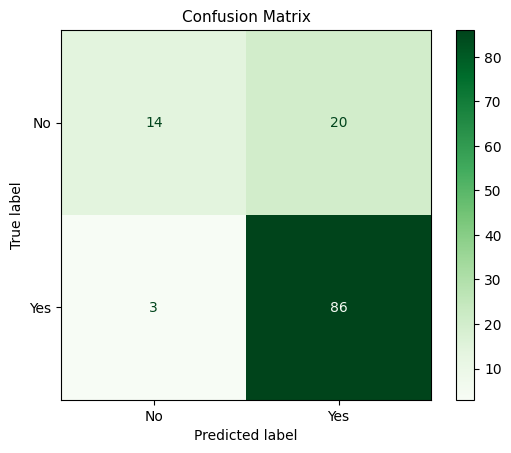

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Confusion Matrix 
cmd = ConfusionMatrixDisplay.from_estimator(grid_svc, X_test, y_test, cmap = 'Greens')
plt.title('Confusion Matrix', size = 11)
plt.show()

The model predicted 14 not approved out of 34 correctly and 20 not approved incorrectly. Additionally, the model predicted 86 approved out of 89 correctly and predicted 3 approved incorrectly. The total classes predicted incorrectly are 23.  

The model demonstrates strong performance in predicting approved loans, with a high number of correct predictions (86 out of 89). The model has more difficulty predicting not approved loans, with 20 incorrect predictions out of 34.

In [32]:
# Classification Report
pred_y = grid_svc.predict(X_test)

report = classification_report(y_test, pred_y, digits = 3)
print(report)

              precision    recall  f1-score   support

          No      0.824     0.412     0.549        34
         Yes      0.811     0.966     0.882        89

    accuracy                          0.813       123
   macro avg      0.817     0.689     0.716       123
weighted avg      0.815     0.813     0.790       123



**Class 'No' (Not Approved):**  
Precision: 0.824  
all the instances predicted as "No", 82.4% were correct.  
Recall: 0.412  
all the actual "No" instances, 41.2% were correctly identified.  
F1-Score: 0.549  
The harmonic mean of precision and recall, indicating a moderate balance but reflecting the low recall.  

**Class 'Yes' (Approved):**  
Precision: 0.811  
all the instances predicted as "Yes", 81.1% were correct.  
Recall: 0.966  
all the actual "Yes" instances, 96.6% were correctly identified.  
F1-Score: 0.882  
High balance between precision and recall, indicating strong performance for this class.

### **<font color='green'>Discussion**

In this study, I carried out supervised machine learning algorithm to decide which model is the best to predict the loan status in loan dataset based on their attributes. I found that `Support Vector Classifier` model is the best via the other estimators and it achieved an overall accuracy of 81.3%, that suggests the model performed pretty well in classifying loan status into correct categories.  

Upon visualizing confusion matrix and classification report, the model performed well in predicting Approved loan and the model shows high precision (81.1%) and recall (96.6%) for the "Yes" (approved) class, indicating that it is highly effective at correctly identifying approved loans. I notice that the model struggles to correctly identify instances where loans are not approved because The precision for the Not Approved class is high (82.4%), but the recall is significantly lower (41.2%).  

The reasons of model's lower perfomance in predicting Not Approved could be the dataset's class imbalance, even `class weight` parameter was used to control the imbalanced classes but it did not result in a significant improvement. In addition, some features with imbalanced categories could affect on the model's performance.  

The SVC model, with its optimized hyper-parameters, has proven to be a robust tool for predicting loan approvals. However, there is still room for improvement, particularly in addressing the challenge of predicting `not approved` loans accurately like below:  

- Implement resampling techniques or advanced methods like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and improve recall for the "No" class.
- Investigate additional features or transformations that could enhance the model's ability to discriminate between approved and not approved loans.
- Conduct further validation using stratified k-fold cross-validation to ensure the model's performance is consistent across different data subsets.